In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [0]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-05-01')

In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-04-27,284.540009,279.950012,281.799988,283.170013,29271900.0,282.405548
2020-04-28,285.829987,278.200012,285.079987,278.579987,28001200.0,277.827911
2020-04-29,289.670013,283.890015,284.730011,287.730011,34320200.0,286.953247


In [4]:
df.to_csv

<bound method NDFrame.to_csv of                   High         Low  ...      Volume   Adj Close
Date                                ...                        
2012-01-03   58.928570   58.428570  ...  75555200.0   50.857235
2012-01-04   59.240002   58.468571  ...  65005500.0   51.130558
2012-01-05   59.792858   58.952858  ...  67817400.0   51.698215
2012-01-06   60.392857   59.888573  ...  79573200.0   52.238651
2012-01-09   61.107143   60.192856  ...  98506100.0   52.155792
...                ...         ...  ...         ...         ...
2020-04-27  284.540009  279.950012  ...  29271900.0  282.405548
2020-04-28  285.829987  278.200012  ...  28001200.0  277.827911
2020-04-29  289.670013  283.890015  ...  34320200.0  286.953247
2020-04-30  294.529999  288.350006  ...  45766000.0  293.006836
2020-05-01  299.000000  285.850006  ...  60154200.0  288.289612

[2096 rows x 6 columns]>

In [5]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792


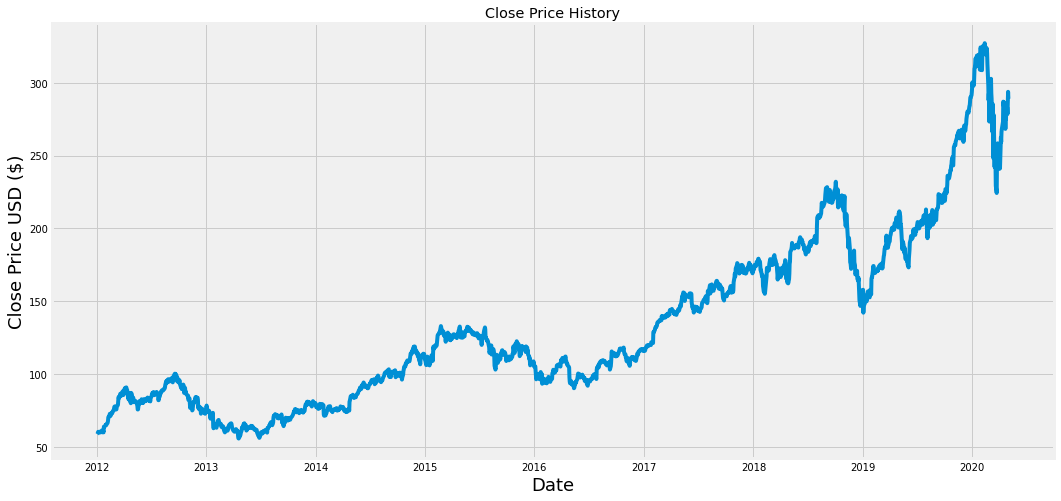

In [6]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [0]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])

In [0]:

#Convert the dataframe to a numpy array
dataset = data.values

In [9]:
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1677

In [10]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.85457426],
       [0.87693886],
       [0.85951143]])

In [0]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]

**Create the training data set**

In [12]:
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01

In [0]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1617, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [77]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=7)

Epoch 1/7
1617/1617 [==============================] - 56s 35ms/step - loss: 6.7749e-05
Epoch 2/7
1617/1617 [==============================] - 56s 35ms/step - loss: 7.6559e-05
Epoch 3/7
1617/1617 [==============================] - 56s 34ms/step - loss: 7.1082e-05
Epoch 4/7
1617/1617 [==============================] - 56s 34ms/step - loss: 7.0921e-05
Epoch 5/7
1617/1617 [==============================] - 56s 35ms/step - loss: 6.6307e-05
Epoch 6/7
1617/1617 [==============================] - 56s 35ms/step - loss: 6.9008e-05
Epoch 7/7
1617/1617 [==============================] - 56s 35ms/step - loss: 7.2763e-05


**Create the testing data set**

In [0]:
#Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]

In [0]:
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [74]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

2.632978889993381

In [75]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


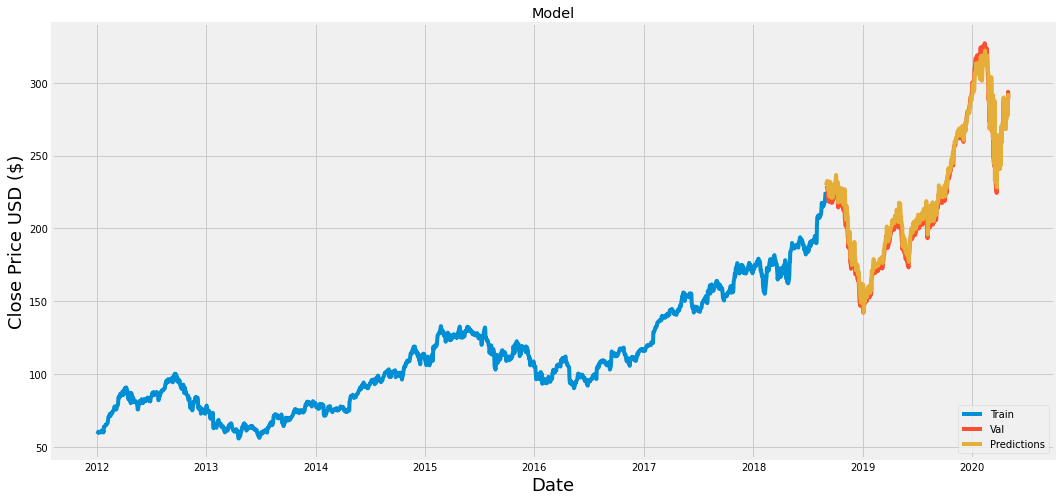

In [76]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [47]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-08-31,227.630005,225.048965
2018-09-04,228.360001,227.739777
2018-09-05,226.869995,228.144287
2018-09-06,223.100006,226.483398
2018-09-07,221.300003,222.595062
...,...,...
2020-04-27,283.170013,281.316467
2020-04-28,278.579987,279.457367
2020-04-29,287.730011,274.926300


In [0]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-05-10')

In [0]:
#Create a new dataframe
new_df = apple_quote.filter(['Close'])

In [0]:
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

In [51]:
last_60_days

array([[324.86999512],
       [324.95001221],
       [319.        ],
       [323.61999512],
       [320.29998779],
       [313.04998779],
       [298.17999268],
       [288.07998657],
       [292.6499939 ],
       [273.51998901],
       [273.35998535],
       [298.80999756],
       [289.32000732],
       [302.73999023],
       [292.92001343],
       [289.02999878],
       [266.17001343],
       [285.33999634],
       [275.42999268],
       [248.22999573],
       [277.97000122],
       [242.21000671],
       [252.86000061],
       [246.66999817],
       [244.77999878],
       [229.24000549],
       [224.36999512],
       [246.88000488],
       [245.52000427],
       [258.44000244],
       [247.74000549],
       [254.80999756],
       [254.28999329],
       [240.91000366],
       [244.92999268],
       [241.41000366],
       [262.47000122],
       [259.42999268],
       [266.07000732],
       [267.98999023],
       [273.25      ],
       [287.04998779],
       [284.42999268],
       [286

In [0]:
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

In [0]:
#Create an empty list
X_test = []

In [0]:
#Append teh past 60 days
X_test.append(last_60_days_scaled)

In [0]:
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)

In [0]:
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
#Get the predicted scaled price
pred_price = model.predict(X_test)

In [58]:
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[305.14984]]
